In [3]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pylab as plt

# exploring dataframe
pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_UBCO.csv')

,Lat,long,elev,period,MAT,MWMT,MCMT,TD,MAP,MSP,...,RH(03),RH(04),RH(05),RH(06),RH(07),RH(08),RH(09),RH(10),RH(11),RH(12)
0,49.939,-119.396,446,year_1901,8.7,21.3,-3.8,25.1,293,139,...,65,58,56,59,53,49,63,59,75,77
1,49.939,-119.396,446,year_1902,8.0,18.4,-3.0,21.4,386,194,...,68,59,62,55,55,52,55,59,75,77
2,49.939,-119.396,446,year_1903,7.5,18.3,-2.1,20.4,399,248,...,60,59,57,56,59,63,68,64,74,74
3,49.939,-119.396,446,year_1904,8.6,19.9,-2.1,22.0,297,86,...,63,57,55,54,54,49,53,64,74,81
4,49.939,-119.396,446,year_1905,8.3,20.7,-2.1,22.8,300,176,...,67,55,58,58,52,54,64,67,74,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,49.939,-119.396,446,year_2015,10.9,22.5,0.0,22.5,332,120,...,69,61,57,59,60,61,63,70,81,83
115,49.939,-119.396,446,year_2016,10.4,21.5,-4.3,25.8,410,175,...,70,59,61,61,64,59,65,75,83,85
116,49.939,-119.396,446,year_2017,9.4,23.1,-4.0,27.1,365,99,...,75,69,60,60,56,57,62,69,84,80
117,49.939,-119.396,446,year_2018,9.6,22.1,0.7,21.4,451,152,...,83,64,58,61,58,61,67,70,83,89


In [94]:
# method chaining and creating a function for my datasets of the same format
def load_and_process(path_to_csv_file):
    
    ##monthaly variables
    # load data and select variables of interest
    dataframe = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,83:251]
    )
    
    # Create dataframe with labelled years
    annual_m = np.arange(1901, 2020, 1).repeat(12)
    annual_m2 = np.vstack(annual_m)
    years_m = pd.DataFrame(data = annual_m2)
    
    # Create list of Strings for each month
    months = [('Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')*119]
    months2 = (
        pd.DataFrame(months)
        .melt()
    )
    

    # Transpose and then melt monthly observations in Dataframe to get 
    # individual variables in separate columns and the months as observations instead of variables
    monthly_data = [months2, years_m]
    for i in range(14):
        monthly_data.append(dataframe.iloc[:,i*12:(i+1)*12].T.melt())
    
    # Cleaning dataframe
    monthly_data = (
                    pd.concat(monthly_data, axis = 1)
                    .drop(columns = 'variable')
    )
    
    # Label columns (variables)
    monthly_data.columns = ['Month','Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'Radiation', 'DDays < 0°C', 'DDays < 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
    print(monthly_data)

    ## seasonal variables 
    # winter variables
    dataframe_s = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,[27,31,35,39,47,51,55,59,63,67,71,75,79]]
    )
    
    # label years, fit together with rest of the dataframe
    annual_w = np.arange(1901, 2020, 1)
    annual_w2 = np.vstack(annual_w)
    years_s = pd.DataFrame(data = annual_w2)
    seasons = [years_s, dataframe_s]
    seasonal_data = pd.concat(seasons, axis = 1)
    
    # label columns (variables)
    seasonal_data.columns = ['Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'DDays < 0°C', 'DDays < 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
    print(seasonal_data)

    ## annual variables
    dataframe_a = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,4:27]
    )
    years = [years_s, dataframe_a]
    yearly_data = pd.concat(years, axis = 1)
    
    # label columns (variables)
    yearly_data.columns = ['Year','Ave Temp','Warmest Month', 'Coldest Month','Difference', 'Mean Precip','May-Sep Precip','Heat-Moist I', 
                           'Summer Heat-Moist I', 'DDays < 0°C', 'DDays > 5°C', 'DDays < 18°C', 'DDays > 18°C', 
                           'Frost Free Days','Begin FFP','End FFP','Frost Free Period', 'Snowfall', 'Min Temp (30)', 'Max Temp (30)', 'Radiation',
                           'Evaporation', 'Moisture Deficit', 'Relative Humidity']
    
    print(yearly_data)
    
load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_UBCO.csv')




     Month  Year  Max Temp  Min Temp  Ave Temp  Precipitation  Radiation  \
0      Jan  1901      -0.3      -7.2      -3.8             26    -9999.0   
1      Feb  1901       1.8      -6.5      -2.3             39    -9999.0   
2      Mar  1901      10.2      -0.2       5.0             11    -9999.0   
3      Apr  1901      14.6       1.4       8.0             20    -9999.0   
4      May  1901      22.0       7.3      14.7             22    -9999.0   
...    ...   ...       ...       ...       ...            ...        ...   
1423   Aug  2019      27.9      13.9      20.9             22    -9999.0   
1424   Sep  2019      19.4       9.7      14.6             83    -9999.0   
1425   Oct  2019      11.3       1.9       6.6             24    -9999.0   
1426   Nov  2019       6.4       0.6       3.5             19    -9999.0   
1427   Dec  2019       2.1      -1.6       0.2             43    -9999.0   

      DDays < 0°C  DDays < 5°C  DDays < 18°C  DDays > 18°C  Frost Free Days  \
0       

<AxesSubplot:>

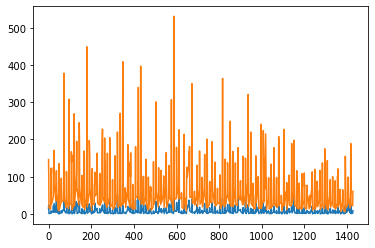

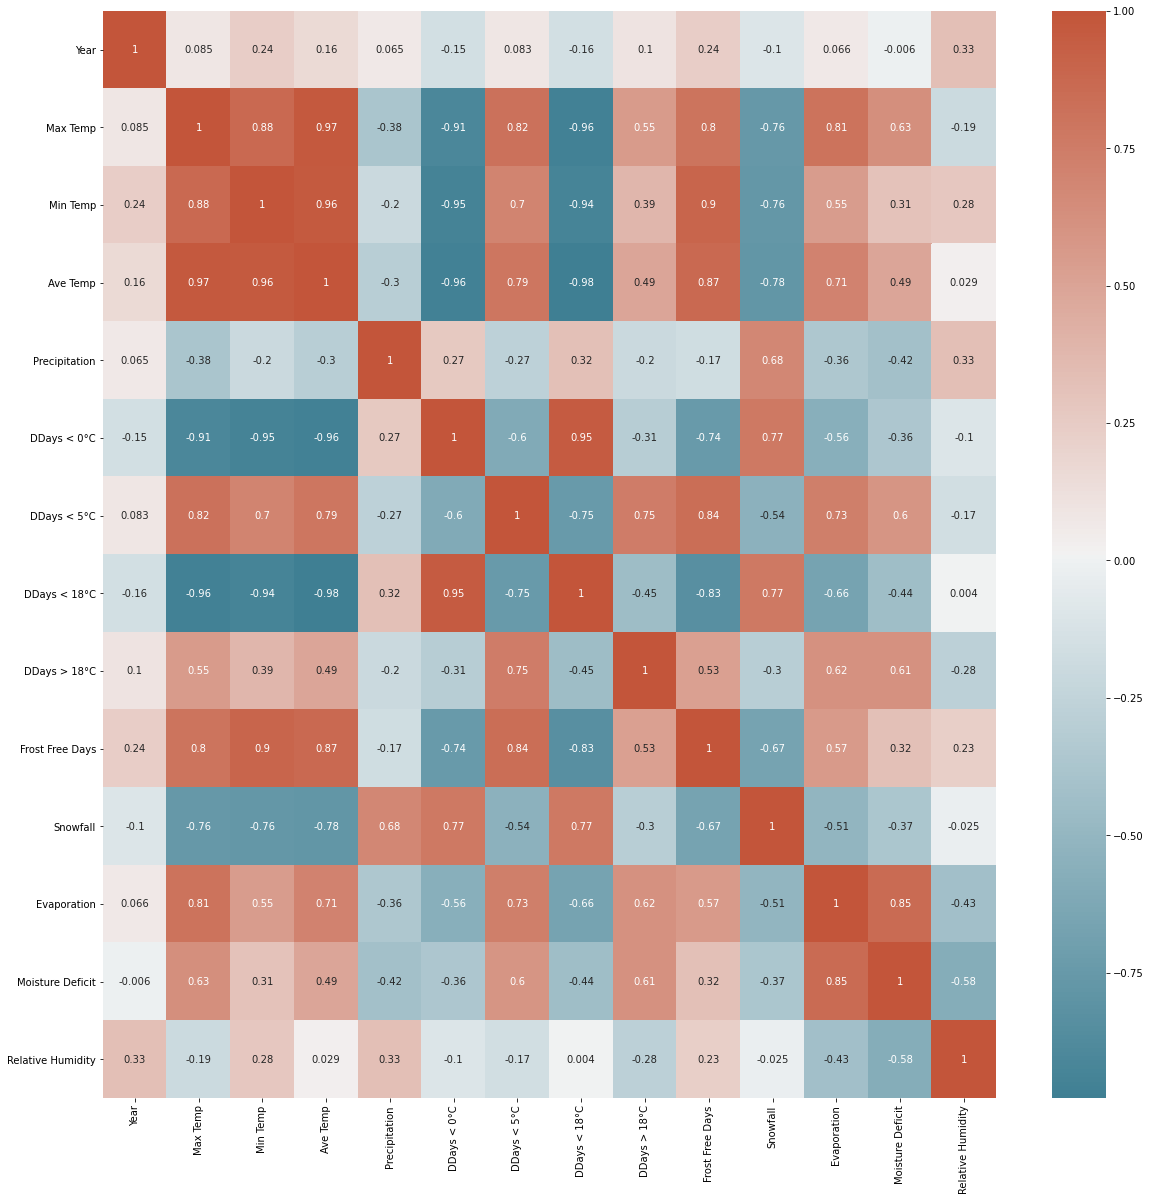

In [132]:
# Exploratory Data Analysis

df = load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_UBCO.csv')

df.shape
df.head(10)
df.columns

df.nunique(axis = 0)
df.describe().apply(lambda s: s.apply(lambda x: format (x, 'f')))

# seems like there is something wrong with the Radiation data (negative radiation). Investigating:
df['Radiation'].value_counts()

# the data assumes the Value **-9999.0** instead of **NaN** as null value. 
# the majority of values is invalid, hence I'm dropping the column

df = df.drop(columns = 'Radiation')
df

winter_months = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']

df_winter = df.loc[df['Month'].isin(winter_months)]
df_winter.Snowfall.plot()
df_winter['DDays < 0°C'].plot()

# Looking at it through a correlation matrix

corr = df_winter.corr()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
            annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

# monthly_snow = df.Snowfall
# monthly_snow.plot()
# monthly_precip = df.Precipitation
# monthly_precip.plot()
# monthly_temp = df['Ave Temp']
# monthly_temp.plot()